## AIR BNB NYC: Story Telling Case Study

## Problem background

### 1.Suppose that you are working as a data analyst at Airbnb. For the past few months, Airbnb has seen a major decline in revenue.
    Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change.
### 2.End Objective
    To prepare for the next best steps that Airbnb needs to take as a business, you have been asked to analyse a dataset consisting of various Airbnb  listings in New York.
### 3.Presentation - I
    Data Analysis Managers: These people manage the data analysts directly for processes and their technical expertise is basic.
    Lead Data Analyst: The lead data analyst looks after the entire team of data and business analysts and is technically sound.
### 4.Presentation - II
    Head of Acquisitions and Operations, NYC: This head looks after all the property and host acquisitions and operations. Acquisition of the best properties, price negotiation, and negotiating the services the properties offer falls under the purview of this role.
    Head of User Experience, NYC: The head of user experience looks after the customer preferences and also handles the properties listed on the website and the Airbnb app. Basically, the head of user experience tries to optimise the order of property listing in certain neighbourhoods and cities in order to get every property the optimal amount of traction.


#### Import the necessary libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [9]:
data = pd.read_csv('AB_NYC_2019.csv')

In [12]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [14]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

(48895, 16)

In [16]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [40]:
data['price'].describe()
data['host_id'].describe()


count    4.889500e+04
mean     6.762001e+07
std      7.861097e+07
min      2.438000e+03
25%      7.822033e+06
50%      3.079382e+07
75%      1.074344e+08
max      2.743213e+08
Name: host_id, dtype: float64

###### - The data set contains 48895 rowns and 16 columbns

### Data Preparation
##### - Checking for null values

In [26]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

###### The columns last_review, reviews_per_month which has null values also there is no consistency and requirement with our analysis, so igonre the same

In [29]:
data.drop(['id','name','last_review'], axis = 1, inplace = True)
data.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [31]:
data.fillna({'reviews_per_month':0},inplace=True)
data.reviews_per_month.isnull().sum()

0

In [33]:
data.host_id.value_counts().head(10)

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

In [35]:
data_2 = data.sort_values(by="calculated_host_listings_count",ascending=False)
data_2.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
39773,219517861,Sonder (NYC),Manhattan,Hell's Kitchen,40.76037,-73.99744,Entire home/apt,185,29,1,1.00,327,332
41463,219517861,Sonder (NYC),Manhattan,Financial District,40.70782,-74.01227,Entire home/apt,396,2,8,2.12,327,289
41469,219517861,Sonder (NYC),Manhattan,Financial District,40.70620,-74.01192,Entire home/apt,498,2,8,2.50,327,255
38294,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73,327,219
41468,219517861,Sonder (NYC),Manhattan,Financial District,40.70726,-74.01060,Entire home/apt,229,2,2,0.77,327,351


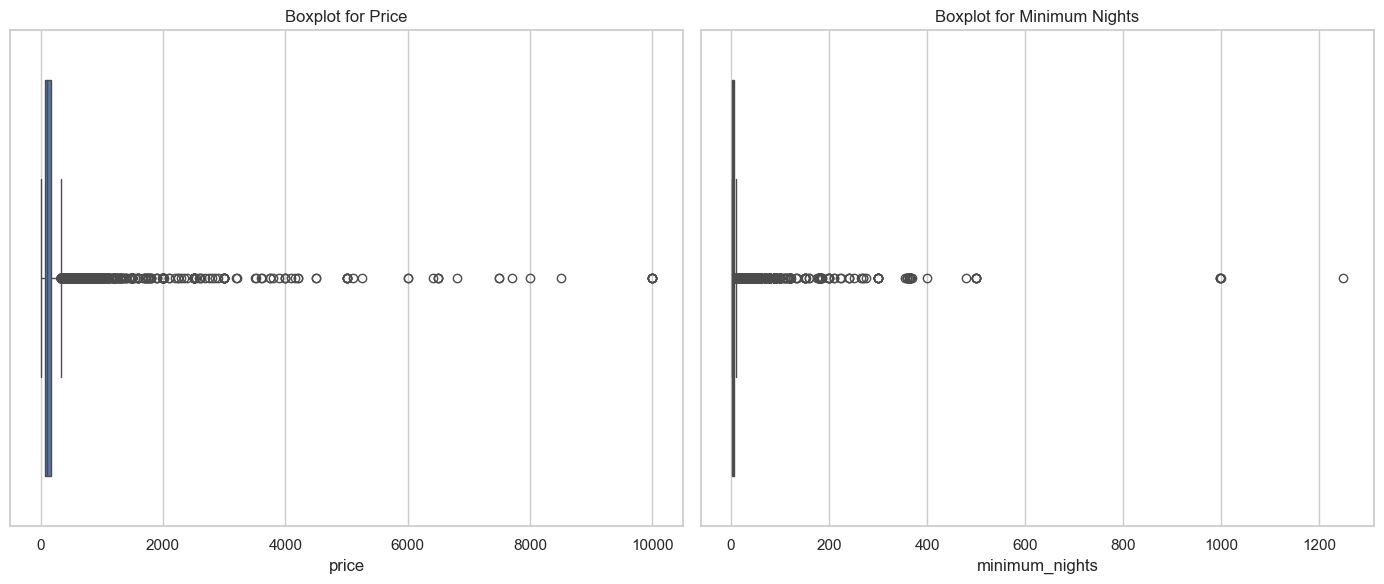

(496      2000
 762      1300
 946      3000
 1105     1300
 1414     1000
          ... 
 48301     999
 48304    2999
 48305    1999
 48523    1369
 48535    1749
 Name: price, Length: 388, dtype: int64,
 14        90
 61       180
 106       90
 245      200
 349       90
         ... 
 48043    180
 48145     90
 48205    180
 48312     90
 48446    365
 Name: minimum_nights, Length: 327, dtype: int64)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set the style for the plots
sns.set(style="whitegrid")

# Plotting boxplots for 'price' and 'minimum_nights' columns to visually check for outliers
plt.figure(figsize=(14, 6))

# Boxplot for 'price'
plt.subplot(1, 2, 1)
sns.boxplot(x=data['price'])
plt.title('Boxplot for Price')

# Boxplot for 'minimum_nights'
plt.subplot(1, 2, 2)
sns.boxplot(x=data['minimum_nights'])
plt.title('Boxplot for Minimum Nights')

plt.tight_layout()
plt.show()

# Calculating Z-scores for 'price' and 'minimum_nights' to detect outliers programmatically
z_scores_price = stats.zscore(data['price'])
z_scores_min_nights = stats.zscore(data['minimum_nights'])

# Identifying outliers (values where |Z-score| > 3 are considered outliers)
outliers_price = data[abs(z_scores_price) > 3]['price']
outliers_min_nights = data[abs(z_scores_min_nights) > 3]['minimum_nights']

outliers_price, outliers_min_nights


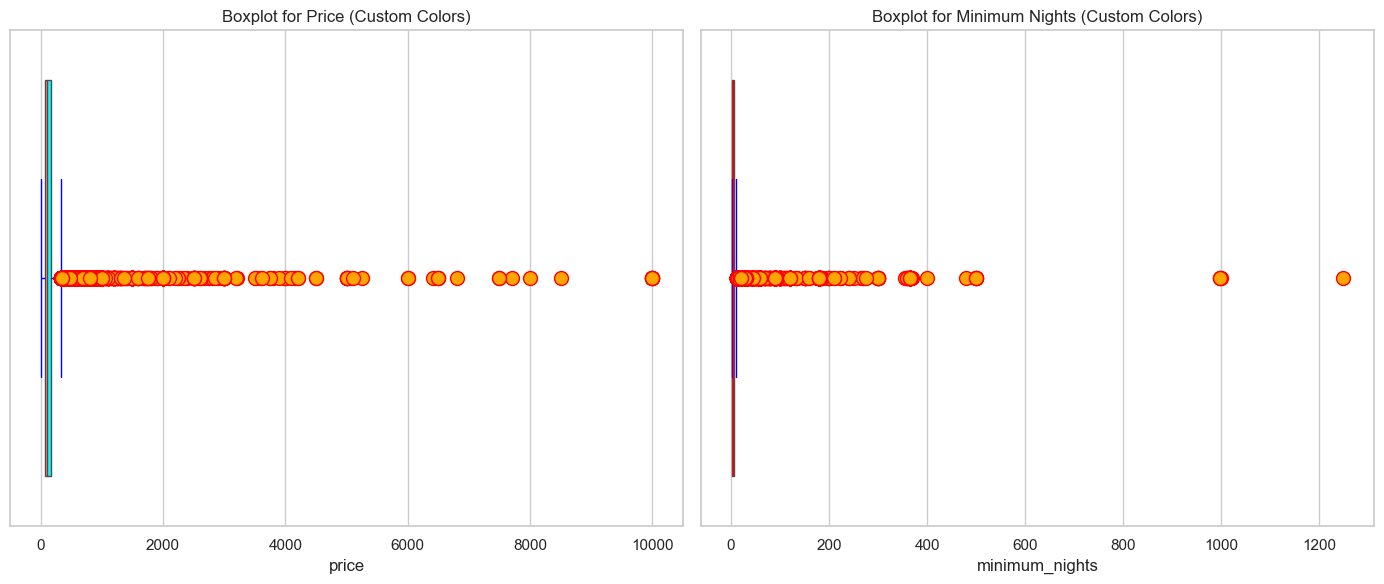

In [44]:

# Let's modify the boxplot code to display the outliers in different colors for clarity.

plt.figure(figsize=(14, 6))

# Custom color palette for outliers and the boxplot
box_colors = {'whiskerprops': {'color': 'blue'},
              'capprops': {'color': 'blue'},
              'boxprops': {'facecolor': 'cyan'},
              'medianprops': {'color': 'red'},
              'flierprops': {'markerfacecolor': 'orange', 'markeredgecolor': 'red', 'markersize': 10}}

# Boxplot for 'price' with custom colors
plt.subplot(1, 2, 1)
sns.boxplot(x=data['price'], **box_colors)
plt.title('Boxplot for Price (Custom Colors)')

# Boxplot for 'minimum_nights' with custom colors
plt.subplot(1, 2, 2)
sns.boxplot(x=data['minimum_nights'], **box_colors)
plt.title('Boxplot for Minimum Nights (Custom Colors)')

plt.tight_layout()
plt.show()


#### Summary of outliers:
Price: There are 388 outliers, with extreme values like $3000, $2999, and $2000.
Minimum Nights: There are 327 outliers, with some listings requiring a minimum of 90 to 365 nights.
These high values deviate significantly from typical listings.

In [47]:
from scipy import stats
z_scores_price = stats.zscore(data['price'])
outliers_price = data[abs(z_scores_price) > 3]


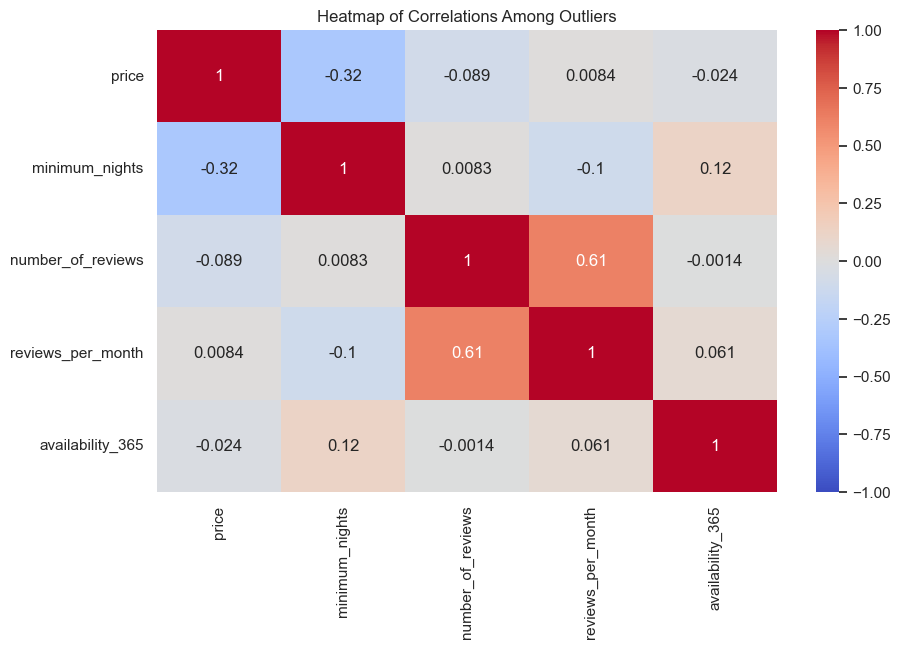

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already calculated the Z-scores
# Filter out the outliers in 'price' and 'minimum_nights' based on Z-scores
outliers_data = data[(abs(z_scores_price) > 3) | (abs(z_scores_min_nights) > 3)]

# Select numerical columns for the heatmap
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

# Correlation matrix for the outliers data
correlation_matrix = outliers_data[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlations Among Outliers')
plt.show()
